In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [3]:
from bq_helper import BigQueryHelper
import bq_helper

medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [4]:
query1 = """SELECT * FROM `bigquery-public-data.cms_medicare.nursing_facilities_2014`"""

In [5]:
data_set = medicare.query_to_pandas_safe(query1)
data_set.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,55809,ST ANTHONY CARE CENTER INC,553 SMALLEY AVE.,HAYWARD,CA,94541,11,11,29.7,172198,...,27.0,55.0,27.0,55.0,NaN,27.0,27.0,45.0,9.0,9
1,55856,HIGH VALLEY LODGE,7912 TOPLEY LANE,SUNLAND,CA,91040,13,11,38.5,286138,...,27.0,64.0,36.0,55.0,NaN,73.0,18.0,73.0,NaN,18
2,65378,COTTONWOOD CARE CENTER,2311 EAST BRIDGE STREET,BRIGHTON,CO,80601,16,11,15.9,109296,...,55.0,NaN,18.0,55.0,NaN,45.0,18.0,18.0,45.0,0
3,75430,MARSHALL LANE MANOR,101 MARSHALL LANE,DERBY,CT,6418,13,11,6.6,21978,...,36.0,NaN,36.0,45.0,NaN,45.0,27.0,45.0,36.0,27
4,75432,MATTATUCK HEALTH CARE FAC,9 CLIFF ST,WATERBURY,CT,6710,15,11,26.0,73160,...,55.0,NaN,55.0,45.0,NaN,55.0,9.0,55.0,55.0,0
5,110194,DONALSONVILLE HOSPITAL INC,102 HOSPITAL CIR,DONALSONVILLE,GA,39845,11,11,13.8,258971,...,45.0,27.0,45.0,64.0,NaN,55.0,27.0,64.0,9.0,27
6,115357,OCONEE HEALTH AND REHABILITATION,107 RIDGEVIEW DR,OCONEE,GA,31067,16,11,26.2,144809,...,45.0,64.0,55.0,73.0,NaN,73.0,9.0,27.0,27.0,9
7,145556,WINNING WHEELS,701 EAST 3RD STREET,PROPHETSTOWN,IL,61277,20,11,51.5,356808,...,9.0,73.0,73.0,NaN,55.0,9.0,9.0,18.0,9.0,45
8,155459,HICKORY CREEK AT NEW CASTLE,901 N 16TH ST,NEW CASTLE,IN,47362,13,11,32.0,216152,...,36.0,64.0,64.0,55.0,NaN,73.0,9.0,45.0,45.0,9
9,165355,KEOTA HEALTH CARE CENTER,204 NORTH KEOKUK WASHINGTON ROAD,KEOTA,IA,52248,16,11,12.3,102024,...,18.0,27.0,18.0,45.0,NaN,27.0,9.0,73.0,18.0,27


In [6]:
data_set.isnull().sum()

provider_id                                                 0
facility_name                                               0
street_address                                              0
city                                                        0
state                                                       0
zip_code                                                    0
total_stays                                                 0
distinct_beneficiaries_per_provider                         0
average_length_of_stays_days                                0
total_snf_charge_amount                                     0
total_snf_medicare_allowed_amount                           0
total_snf_medicare_payment_amount                           0
total_snf_medicare_standard_payment_amount                  0
average_age                                                 0
male_beneficiaries                                       1656
female_beneficiaries                                     1656
nondual_

In [7]:
data_set.describe()

,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,total_snf_medicare_payment_amount,total_snf_medicare_standard_payment_amount,average_age,male_beneficiaries,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
count,15026.000000,15026.000000,15026.000000,15026.000000,1.502600e+04,1.502600e+04,1.502600e+04,1.502600e+04,15026.000000,13370.000000,...,14991.000000,14619.000000,14872.000000,13629.000000,231.000000,13917.000000,15024.000000,14318.000000,14885.000000,15026.000000
mean,49548.870957,166.301544,132.337149,28.130075,2.979363e+06,2.186786e+06,1.804748e+06,1.856649e+06,78.644150,56.341286,...,37.509572,49.233805,46.587614,61.395407,69.891775,57.198031,18.347378,54.852284,20.156869,18.018967
std,26818.941024,151.793460,123.906842,7.383997,3.274693e+06,2.123067e+06,1.811159e+06,1.734586e+06,4.686173,46.411718,...,10.540757,10.952155,10.988216,9.270699,6.134115,10.022661,7.990701,10.606628,12.137511,6.689469
min,660.000000,11.000000,11.000000,2.000000,2.197800e+04,7.064000e+03,7.064000e+03,8.150000e+03,45.000000,0.000000,...,0.000000,6.000000,0.000000,10.000000,38.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,29349.000000,64.000000,50.000000,23.700000,1.015431e+06,8.021298e+05,6.372892e+05,6.925308e+05,76.000000,25.000000,...,30.000000,42.000000,39.000000,56.000000,68.000000,51.000000,13.000000,48.000000,12.000000,14.000000
50%,48185.000000,123.000000,95.000000,27.800000,2.033186e+06,1.579600e+06,1.273338e+06,1.377898e+06,79.000000,42.000000,...,37.000000,49.000000,47.000000,63.000000,72.000000,58.000000,18.000000,56.000000,17.000000,18.000000
75%,72014.250000,216.000000,172.000000,32.400000,3.764452e+06,2.856638e+06,2.337140e+06,2.435829e+06,82.000000,72.000000,...,44.000000,57.000000,54.000000,68.000000,74.000000,65.000000,23.000000,63.000000,26.000000,22.000000
max,99901.000000,2026.000000,1772.000000,68.600000,1.017705e+08,2.720066e+07,2.415078e+07,2.041167e+07,92.000000,599.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,70.000000,75.000000,75.000000,59.000000


In [8]:
total_facilities_series = data_set.state.value_counts()
nursing_facilities = total_facilities_series.to_frame().reset_index()
nursing_facilities.rename(columns = {'index' : 'state', 'state' : 'total_facilities'}, inplace = True)

In [9]:
nursing_facilities

,state,total_facilities
0,TX,1200
1,CA,1084
2,OH,936
3,IL,709
4,PA,703
5,FL,688
6,NY,618
7,IN,511
8,MO,497
9,MI,424


Text(0.5, 1.0, 'Total Number of Nursing Facilities')

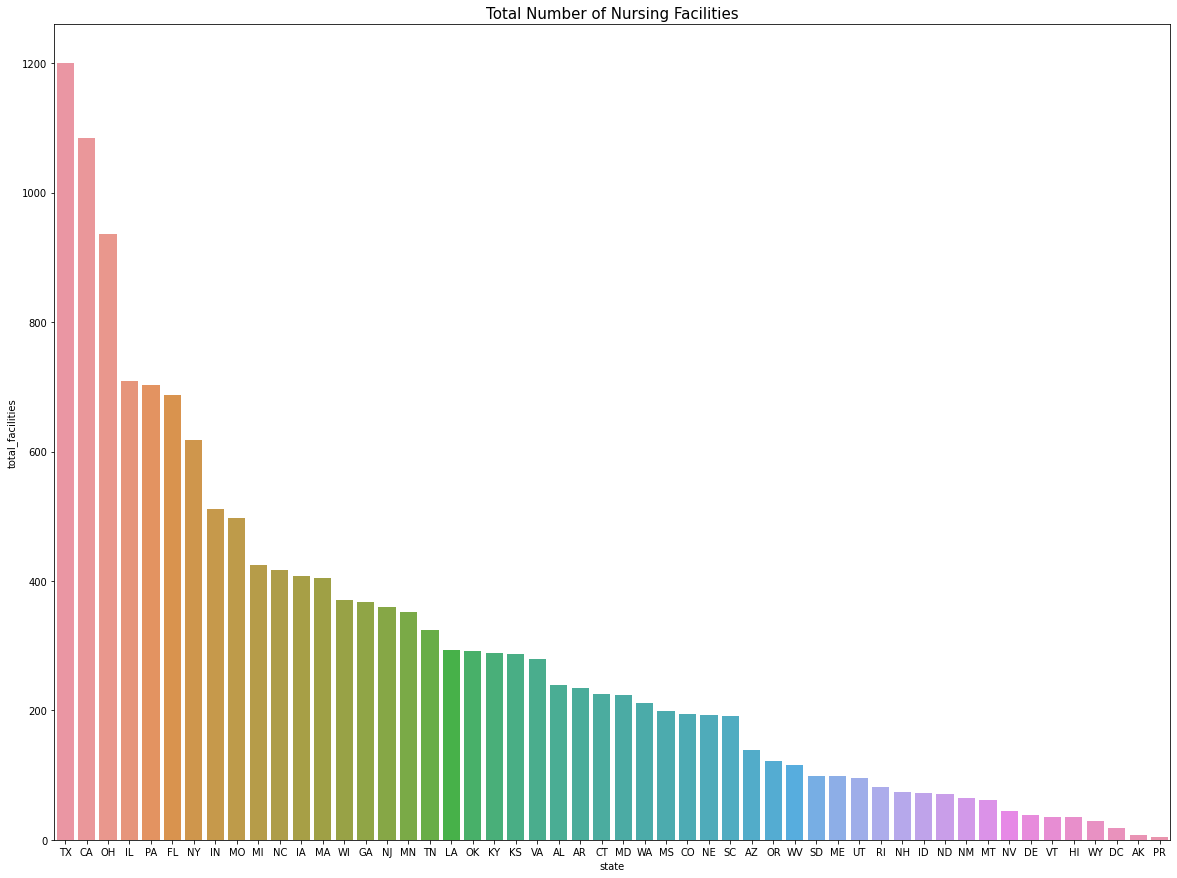

In [10]:
plt.figure(figsize=(20, 15))
nf_plot = sns.barplot(x = nursing_facilities['state'], y = nursing_facilities['total_facilities'])
nf_plot.set_title('Total Number of Nursing Facilities', size = 15)

In [11]:
data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = nursing_facilities.state,
        z = nursing_facilities.total_facilities,
        locationmode = 'USA-states',
        text = nursing_facilities.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Facilities in Different States")
        )
       ]

layout = dict(
        title = 'Nursing Facilities in Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [12]:
hcc = pd.DataFrame(data_set.groupby(['state'])['average_hcc_score'].mean())
min_hcc = data_set.groupby(['state'])['average_hcc_score'].min()
max_hcc = data_set.groupby(['state'])['average_hcc_score'].max()

In [13]:
hcc['min_hcc'] = min_hcc
hcc['max_hcc'] = max_hcc

In [14]:
hcc.reset_index(inplace = True)

In [15]:
hcc

,state,average_hcc_score,min_hcc,max_hcc
0,AK,2.028571,1.77,2.32
1,AL,2.173682,1.24,3.98
2,AR,2.161410,1.17,3.65
3,AZ,2.415435,1.27,5.42
4,CA,2.612878,1.11,9.15
5,CO,2.136872,0.84,5.02
6,CT,2.335467,1.32,5.51
7,DC,2.217778,1.17,4.21
8,DE,2.331316,1.28,3.24
9,FL,2.514390,1.11,5.70


In [16]:
trace1 = go.Bar(
    x=hcc['state'],
    y=hcc.max_hcc,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=hcc['state'],
    y=hcc.min_hcc,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [17]:
data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = hcc.state,
        z = hcc.average_hcc_score,
        locationmode = 'USA-states',
        text = hcc.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Average HCC Scores")
        )
       ]

layout = dict(
        title = 'Average HCC Scores for different states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [18]:
facility_name = data_set.groupby(['facility_name','city','state'])['average_hcc_score'].mean().sort_values(ascending = False)
data_facility_name = pd.DataFrame(facility_name)
data_facility_name.reset_index(inplace = True)
data_facility_name

,facility_name,city,state,average_hcc_score
0,DOCTORS HOSP OF WEST COVINA,WEST COVINA,CA,9.15
1,FOX SUBACUTE AT MECHANICSBURG,MECHANICSBURG,PA,7.84
2,OMNI CONTINUING CARE,DETROIT,MI,7.12
3,ORCHARDS OF RIDGEWOOD LIVING & REHAB CTR THE,AKRON,OH,7.07
4,MANORCARE HEALTH SYSTEM - ADELPHI,ADELPHI,MD,6.77
...,...,...,...,...
15015,MERCER COUNTY JOINT TOWNSHIP COMMUNITY HOSPITAL,COLDWATER,OH,0.85
15016,ST ANTHONY SUMMIT MEDICAL CENTER,FRISCO,CO,0.84
15017,ALDEN ESTATES OF SKOKIE,SKOKIE,IL,0.81
15018,POWDER RIVER MANOR,BROADUS,MT,0.79


In [19]:
#nursing facilities with high HCC
data_facility_name.head(10)

,facility_name,city,state,average_hcc_score
0,DOCTORS HOSP OF WEST COVINA,WEST COVINA,CA,9.15
1,FOX SUBACUTE AT MECHANICSBURG,MECHANICSBURG,PA,7.84
2,OMNI CONTINUING CARE,DETROIT,MI,7.12
3,ORCHARDS OF RIDGEWOOD LIVING & REHAB CTR THE,AKRON,OH,7.07
4,MANORCARE HEALTH SYSTEM - ADELPHI,ADELPHI,MD,6.77
5,NORTH VALLEY NURSING CENTER,TUJUNGA,CA,6.76
6,PATAPSCO VALLEY CENTER,RANDALLSTOWN,MD,6.73
7,SPRINGBROOK CENTER,SILVER SPRING,MD,6.72
8,GLENSHIRE NURSING & REHAB CTRE,RICHTON PARK,IL,6.21
9,PARAMOUNT MEADOWS NURSING CTR.,PARAMOUNT,CA,6.15


In [20]:
#nursing facilities with low HCC
data_facility_name.tail()

,facility_name,city,state,average_hcc_score
15015,MERCER COUNTY JOINT TOWNSHIP COMMUNITY HOSPITAL,COLDWATER,OH,0.85
15016,ST ANTHONY SUMMIT MEDICAL CENTER,FRISCO,CO,0.84
15017,ALDEN ESTATES OF SKOKIE,SKOKIE,IL,0.81
15018,POWDER RIVER MANOR,BROADUS,MT,0.79
15019,KFH - MALAMA 'OHANA NURSING AND REHAB CENTER,HONOLULU,HI,0.75


In [21]:
#plotting of facilities with Max avg HCC
temp = data_facility_name.head(10)
y = list(reversed(list(temp.facility_name)))
x = list(reversed(list(temp.average_hcc_score)))
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f79284'),)
layout = dict(height=400, width=700, margin=dict(l=400), title='Nursing Facilities having Maximum Average HCC Scores')
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [22]:
#filling null values with mean values
data_set['male_beneficiaries'] = data_set['male_beneficiaries'].fillna(data_set['male_beneficiaries'].mean())
data_set['female_beneficiaries'] = data_set['female_beneficiaries'].fillna(data_set['female_beneficiaries'].mean())

In [23]:
male_beneficiaries = pd.DataFrame(data_set.groupby(['state'])['male_beneficiaries'].sum().sort_values(ascending = False)).reset_index()
female_beneficiaries = pd.DataFrame(data_set.groupby(['state'])['female_beneficiaries'].sum().sort_values(ascending = False)).reset_index()
male_female_beneficiaries = pd.merge(male_beneficiaries,female_beneficiaries)

In [24]:
male_female_beneficiaries

,state,male_beneficiaries,female_beneficiaries
0,CA,70616.152506,96264.714435
1,FL,63440.825729,96458.876589
2,TX,54651.145251,87221.911444
3,NY,45867.699177,72355.416156
4,IL,43973.794615,70298.742109
5,OH,40822.247943,64060.040389
6,PA,35595.723037,58773.747644
7,NJ,35278.778010,56497.213613
8,MI,28500.825729,47136.876589
9,MA,26667.262453,42714.646372


In [25]:
trace1 = go.Bar(
    x=male_female_beneficiaries.state,
    y=male_female_beneficiaries.male_beneficiaries,
    marker=dict(color='#e584f7'),
    name='Total Male beneficiaries'
)
trace2 = go.Bar(
    x=male_female_beneficiaries.state,
    y=male_female_beneficiaries.female_beneficiaries,
    marker=dict(color='#a0f784'),
    name='Total Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Male and Female Beneficiaries in 2014 in different states')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [26]:
male_female_beneficiaries['difference'] = male_female_beneficiaries['female_beneficiaries'] - male_female_beneficiaries['male_beneficiaries']

trace1 = go.Bar(
    x=male_female_beneficiaries.state,
    y=male_female_beneficiaries.difference,
    marker=dict(color='#aabfe0'),
    name='Total Male beneficiaries'
)
data = [trace1]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Difference in Male and Female Beneficiaries in Different State')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [27]:
average_lenght_of_staydays = pd.DataFrame(data_set.groupby(['state'])['average_length_of_stays_days'].mean().sort_values(ascending = False)).reset_index()
average_of_totalstay = pd.DataFrame(data_set.groupby(['state'])['total_stays'].mean().sort_values(ascending = False)).reset_index()
data_stays = pd.merge(average_lenght_of_staydays, average_of_totalstay)
data_stays

,state,average_length_of_stays_days,total_stays
0,LA,32.734694,112.000000
1,IN,32.112916,138.346380
2,MS,31.970854,140.924623
3,TX,31.811833,131.085000
4,TN,30.347840,186.456790
5,IL,30.319182,194.009873
6,DC,29.855556,206.666667
7,KY,29.226389,154.659722
8,WV,29.178261,121.747826
9,CA,28.833487,178.571956


In [ ]:
trace0 = go.Scatter(
    x=data_stays.average_length_of_stays_days,
    y=data_stays.state,
    mode='markers',
    name='Average Length of Stay in a State',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=data_stays.total_stays,
    y=data_stays.state,
    mode='markers',
    name='Total Stays in a State ',
    marker=dict(
        color='#00d8d8',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="Average Total Stays of each State and Average Length of Stays for each state ",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),

        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),

    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [29]:
X = data_set.copy()
X.index = X.provider_id
X = X.drop(['provider_id', 'facility_name', 'city', 'state','street_address','zip_code','nondual_beneficiaries','dual_beneficiaries','white_beneficiaries','black_beneficiaries','hispanic_beneficiaries','asian_pacific_islander_beneficiaries','american_indian_or_alaska_native_beneficiaries'], axis=1)
X = X.dropna()
X

,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,total_snf_medicare_payment_amount,total_snf_medicare_standard_payment_amount,average_age,male_beneficiaries,female_beneficiaries,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
provider_id,,,,,,,,,,,,,,,,,,,,,
240014,11,11,2.5,50675,10907,10147,9230,81,56.341286,89.443829,...,27.0,36.0,36.0,64.0,73.0,45.0,27.0,36.0,27.0,18
275070,12,11,21.7,177310,66597,42581,47412,80,56.341286,89.443829,...,55.0,27.0,9.0,27.0,55.0,27.0,45.0,36.0,0.0,36
335751,17,11,25.1,416428,439089,396681,324925,56,56.341286,89.443829,...,36.0,45.0,45.0,18.0,45.0,64.0,18.0,36.0,9.0,9
355096,13,11,7.4,29945,23143,23143,29890,75,56.341286,89.443829,...,9.0,55.0,9.0,36.0,73.0,18.0,9.0,0.0,55.0,0
385277,13,11,24.7,117168,143756,118372,103738,80,56.341286,89.443829,...,27.0,36.0,45.0,36.0,73.0,55.0,0.0,27.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325105,141,105,29.5,3785608,2039835,1676403,1794923,78,44.000000,61.000000,...,28.0,47.0,28.0,47.0,73.0,35.0,20.0,41.0,13.0,16
505325,115,95,28.5,2149751,1658654,1361342,1342423,77,47.000000,48.000000,...,31.0,43.0,27.0,47.0,75.0,39.0,13.0,40.0,13.0,11
465172,75,66,35.5,1676369,1394176,1121184,1237959,82,54.000000,12.000000,...,20.0,47.0,50.0,56.0,74.0,53.0,11.0,32.0,18.0,14


In [30]:
#k-means clustering
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
X['cluster'] = kmeans.fit_predict(X)

In [31]:
print ("Group A Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 0].index[:5])
temp = data_set.loc[data_set['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()

print ("Group B Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 1].index[:5])
temp = data_set.loc[data_set['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()    

print ("Group C Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 2].index[:5])
temp = data_set.loc[data_set['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()

#print ("Group D Cluster Elements: ")
#cluster_elements = list(X[X['cluster'] == 3].index[:5])
#temp = data_set.loc[data_set['provider_id'].isin(cluster_elements)]
#j = 1
#for i, row in temp[['facility_name', 'city', 'state']].iterrows():
 #   print (j, "\t "+", ".join(list(row)).title())
  #  j+= 1

Group A Cluster Elements: 
1 	 Northfield Hospital, Northfield, Mn
2 	 Sheridan Memorial Nursing Home, Plentywood, Mt
3 	 The Bronx-Lebanon Highbridge Woodycrest Center, Bronx, Ny
4 	 Aneta Parkview Health Ctr, Aneta, Nd
5 	 Lawrence Convalescent Ctr, Portland, Or

Group B Cluster Elements: 
1 	 Prestige Care & Rehabilitation - The Orchards, Lewiston, Id
2 	 Fort Madison Health Center, Fort Madison, Ia
3 	 Empres Post Acute Rehabilitation, Petaluma, Ca
4 	 Richfield Rehabilitation And Care Center, Richfield, Ut
5 	 Taos Living Center, Taos, Nm

Group C Cluster Elements: 
1 	 Lafayette Care Center, Lafayette, Ca
2 	 Maple Lane Health And Rehab, Shawano, Wi
3 	 Parkview Care Center, Denver, Co
4 	 Rockwood South Hill, Spokane, Wa
5 	 Good Samaritan Society - Van Buren, Keosauqua, Ia

